In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
# from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [27]:
names1=['Br25 ref' , 'Br25 IMN' , 'Br25 EDA' , 'EDA ref' , 'EDA IMN' , 'EDA EDA' , 'IMN ref' , 'IMN IMN' , 'IMN EDA']




# skip = 1

data = pd.read_csv('2_27_23_EDA_IMN_data.csv', delimiter=',',index_col=False, skiprows = 0)


In [13]:
print(data)
print(np.shape(data.values[:,1:]))


      Time (ns)  Br25 ref  Br25 IMN  Br25 EDA  EDA ref  EDA IMN  EDA EDA  \
0         0.000         1         4       1.0      5.0      5.0        2   
1         0.128         1         2       2.0      2.0      2.0        2   
2         0.256         1         3       2.0      1.0      3.0        2   
3         0.384         4         4       3.0      1.0      5.0        2   
4         0.512         2         1       3.0      4.0      1.0        1   
...         ...       ...       ...       ...      ...      ...      ...   
7808    999.424         0         0       NaN      NaN      NaN        0   
7809    999.552         0         0       NaN      NaN      NaN        0   
7810    999.680         0         0       NaN      NaN      NaN        0   
7811    999.808         0         0       NaN      NaN      NaN        0   
7812    999.936         0         0       NaN      NaN      NaN        0   

      IMN ref  IMN IMN  IMN EDA  
0           0        4        6  
1           4      

In [17]:
### plotter = 3
# prange = np.argmin(data.values[:,plotter])
# plt.plot(data.values[:prange,0], data.values[:prange,plotter]/np.max(data.values[:prange,plotter]), label = 'A4', c= 'red')
# # plt.yscale('log')
# plt.show

size = 9

taus = np.zeros(size)
tau1 = np.zeros(size)
tau2 = np.zeros(size)
taua = np.zeros(size)
beta = np.zeros(size)
strfits = np.zeros(np.shape(data.values))
dubfits = np.zeros(np.shape(data.values))

scale = 1e9

for K in range (size):
    plotter = K +1
#     print(plotter)
    if (data.values[7812,plotter]==0):
        prange = 7812
    elif (data.values[3906,plotter]==0):
        prange = 3906
    else:
        print("ERROR")
        break
        
    datmax = np.argmax(data.values[:prange,plotter])
    time = data.values[datmax:prange,0]
    stretchfit = stretch_exp_fit(data.values[datmax:prange,plotter]/np.max(data.values[:prange,plotter]), time*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
    doublefit = double_exp_fit(data.values[datmax:prange,plotter]/np.max(data.values[:prange,plotter]), time*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

    taus[K] = stretchfit[3]*scale
    beta[K] = stretchfit[1]
    tau1[K] = doublefit[0]*scale
    tau2[K] = doublefit[2]*scale
    taua[K] = doublefit[4]*scale
    strfits[datmax:prange,K+1] = stretchfit[4]
    dubfits[datmax:prange,K+1] = doublefit[5]

#     print("Fitted" + f" {K+1}")
    print("a1 + a2 for sample" + f" {K+1} =" + f" {doublefit[1]+doublefit[3]}")


    
#     plt.plot(time, data.values[datmax:prange,plotter]/np.max(data.values[:prange,plotter]), c= 'red', lw = 0.5)
#     plt.yscale('log')
#     plt.show()

a1 + a2 for sample 1 = 1.0234433630474877
a1 + a2 for sample 2 = 1.0296313555385486
a1 + a2 for sample 3 = 1.0277521134826935
a1 + a2 for sample 4 = 1.0090861406352851
a1 + a2 for sample 5 = 1.0092994301669669
a1 + a2 for sample 6 = 1.045290068059375
a1 + a2 for sample 7 = 1.0522407364831563
a1 + a2 for sample 8 = 0.984098125301235
a1 + a2 for sample 9 = 0.8779753738115204


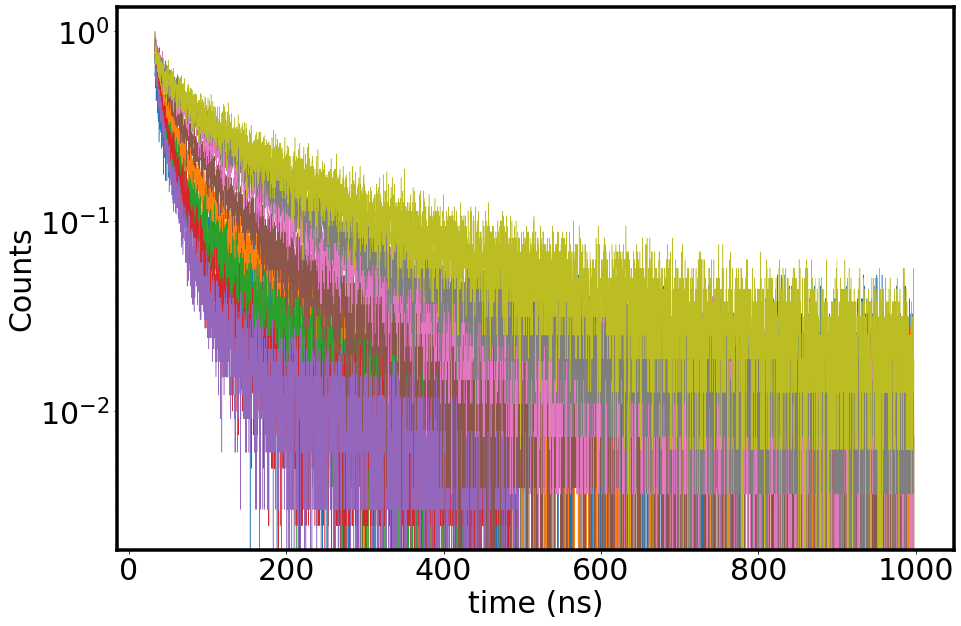

In [35]:
fig = plt.figure(figsize =(15, 10))
size2 = range(size)
# size2 = [0,1,2]



for L in size2:
    plotter = L+1
    if (data.values[7812,plotter]==0):
        prange = 7812
    elif (data.values[3906,plotter]==0):
        prange = 3906
    else:
        print("ERROR")
        break
    time = data.values[datmax:prange,0]

#     plt.plot(B1['XAxis'].values, B1['Counts'].values/np.max(B1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
    plt.plot(time, data.values[datmax:prange,plotter]/np.max(data.values[:prange,plotter]), lw = 0.5,)
plt.yscale('log')
    
fs = 30


plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.show()




# plt.legend(["reference","APTMS", "anthraTMS", "PanthraTES"], fontsize = "small")
# plt.xlabel('time (ns)',{'fontsize': fs}, weight = "bold")
# plt.ylabel('Counts',{'fontsize': fs}, weight = "bold")


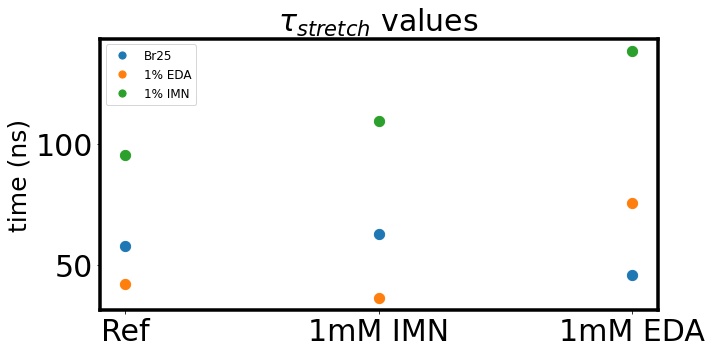

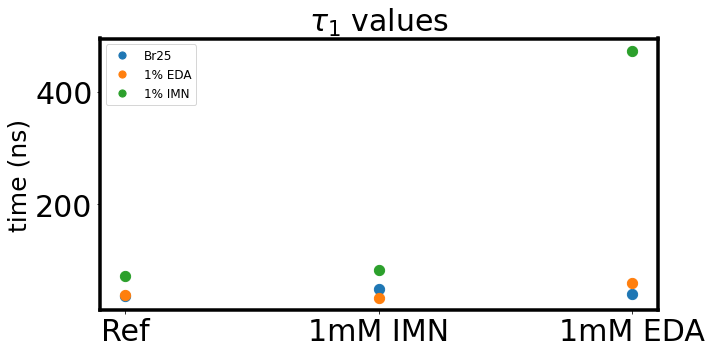

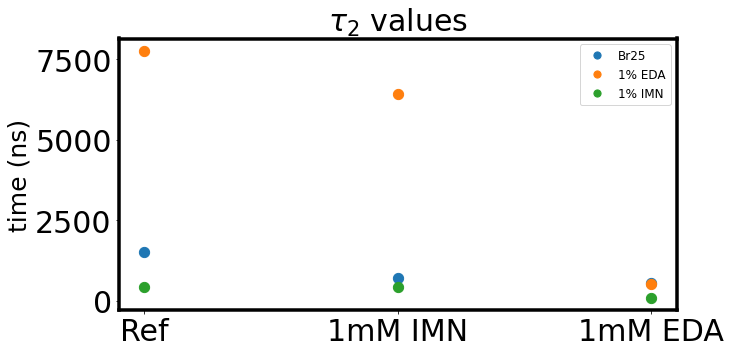

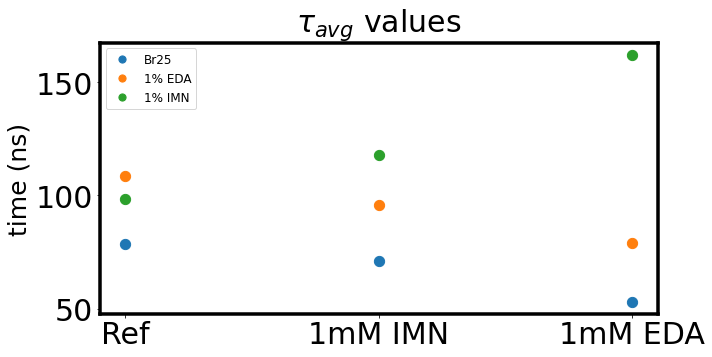

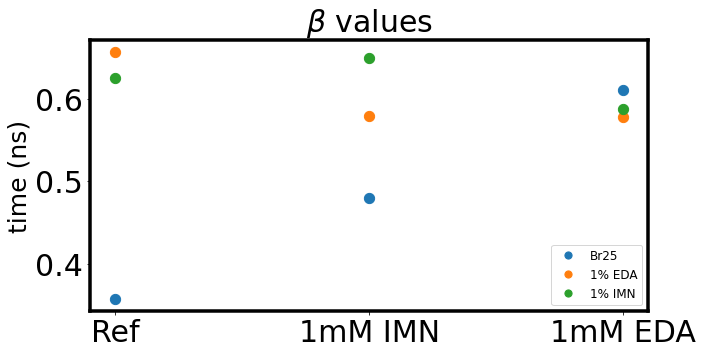

In [83]:

fig = plt.figure(figsize =(10, 5))
plt.plot(['Ref','1mM IMN','1mM EDA'],taus[0:3],'.', label = "Br25" )
plt.plot(['Ref','1mM IMN','1mM EDA'],taus[3:6],'.', label = "1% EDA")
plt.plot(['Ref','1mM IMN','1mM EDA'],taus[6:9],'.', label = "1% IMN")
plt.title(r"$\tau_{stretch}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(['Ref','1mM IMN','1mM EDA'],tau1[0:3],'.', label = "Br25" )
plt.plot(['Ref','1mM IMN','1mM EDA'],tau1[3:6],'.', label = "1% EDA")
plt.plot(['Ref','1mM IMN','1mM EDA'],tau1[6:9],'.', label = "1% IMN")
plt.title(r"$\tau_{1}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(['Ref','1mM IMN','1mM EDA'],tau2[0:3],'.', label = "Br25" )
plt.plot(['Ref','1mM IMN','1mM EDA'],tau2[3:6],'.', label = "1% EDA")
plt.plot(['Ref','1mM IMN','1mM EDA'],tau2[6:9],'.', label = "1% IMN")
plt.title(r"$\tau_{2}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(['Ref','1mM IMN','1mM EDA'],taua[0:3],'.', label = "Br25" )
plt.plot(['Ref','1mM IMN','1mM EDA'],taua[3:6],'.', label = "1% EDA")
plt.plot(['Ref','1mM IMN','1mM EDA'],taua[6:9],'.', label = "1% IMN")
plt.title(r"$\tau_{avg}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(['Ref','1mM IMN','1mM EDA'],beta[0:3],'.', label = "Br25" )
plt.plot(['Ref','1mM IMN','1mM EDA'],beta[3:6],'.', label = "1% EDA")
plt.plot(['Ref','1mM IMN','1mM EDA'],beta[6:9],'.', label = "1% IMN")
plt.title(r"$\beta$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()